<a href="https://colab.research.google.com/github/DSookarah/CE888/blob/main/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [8]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [9]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [10]:
def bootstrap_mean(x, sample_size, n_bootstraps):
  list_values = []
  for i in range(n_bootstraps):
    samples = np.random.choice(x,sample_size)
    mean = np.mean(samples)
    list_values.append(mean)
  lower, upper = np.percentile(list_values,[2.5,97.5])
  data_mean = sum(list_values)/len(list_values)

  return data_mean, lower, upper


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

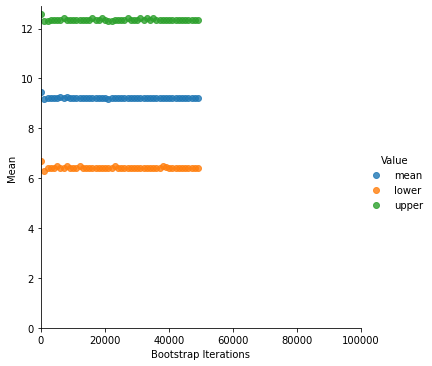

In [11]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [12]:
# Bootstrap with CI as parameter

def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):

 list_values = []
 for i in range(n_bootstraps):
    samples = np.random.choice(sample,sample_size)
    mean = np.mean(samples)
    list_values.append(mean)
 lower, upper = np.percentile(list_values,[((100-ci)/2),((100+ci)/2)]) 
 data_mean = sum(list_values)/len(list_values)

 return data_mean, lower, upper



In [13]:
# Bootstrap with CI as parameter

def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):

 list_values = []
 for i in range(n_bootstraps):
    samples = np.random.choice(sample,sample_size)
    sd = np.std(samples)
    list_values.append(sd)
 lower, upper = np.percentile(list_values,[((100-ci)/2),((100+ci)/2)]) 
 data_sd = sum(list_values)/len(list_values)

 return data_sd, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

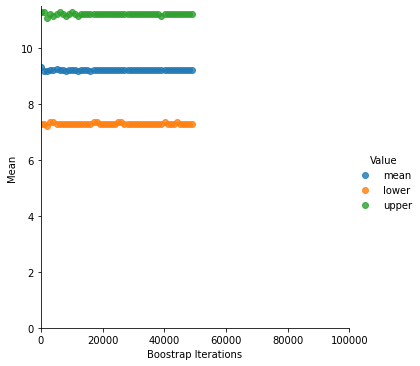

In [14]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


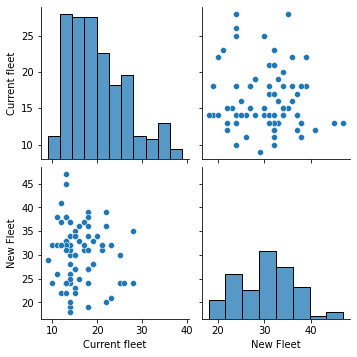

In [15]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
new_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
sns.pairplot(new_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 60000.0)

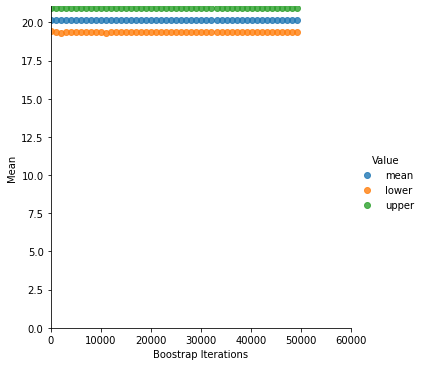

In [16]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new_df['Current fleet'], new_df['Current fleet'].shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 60000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 60000.0)

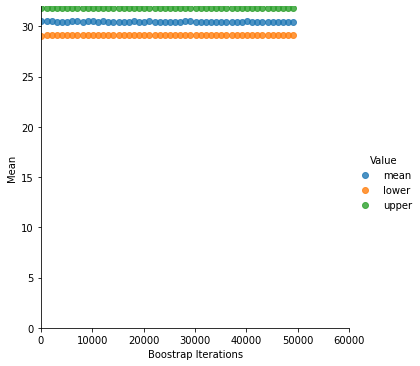

In [17]:
data = new_df['New Fleet'][0:79]
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 60000)

# sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [18]:
new_df.describe()

,Current fleet,New Fleet
count,249.000000,79.000000
mean,20.144578,30.481013
std,6.414699,6.107710
min,9.000000,18.000000
25%,15.000000,25.500000
50%,19.000000,32.000000
75%,24.000000,34.000000
max,39.000000,47.000000


P-Test

In [19]:
def permut_test(sample1, sample2, n_permutations):
    concat = np.concatenate((sample1,sample2))
    difference = np.mean(sample2) - np.mean(sample1)

    diff =[]
    for i in range(n_permutations):
      permutations = np.random.permutation(concat)
      permutations1 = permutations[:int(len(sample1))]
      permutations2 = permutations[int(len(sample1)):]
      new_difference = np.mean(permutations2) - np.mean(permutations1)
      diff.append(new_difference)
    pvalue = np.sum(diff>difference)/n_permutations
    return pvalue

In [20]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [21]:
voting = pd.DataFrame([dem_share_PA,dem_share_OH]).T

voting = voting.rename(columns={0: "PA", 1: "OH"})

In [22]:
voting

,PA,OH
0,60.08,56.94
1,40.64,50.46
2,36.07,65.99
3,41.21,45.88
4,31.04,42.23
...,...,...
83,NaN,53.53
84,NaN,36.54
85,NaN,49.58
86,NaN,41.97


In [23]:
# pvalue of voting_data
permut_test(dem_share_OH,dem_share_PA,10000) 

0.2366

In [24]:
len(dem_share_OH)

88

In [25]:
# The 80% confidence intervals for the means of the current fleet using 10000 bootstraps
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA) , 100000, 98)

(45.474247637312786, 42.76700895522388, 48.334777611940304)

In [26]:
## The 92% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 
bootstrap_mean_ci(new_df['Current fleet'][0:79], new_df['Current fleet'][0:79].shape[0], 10000, 73)

(16.03107974683546, 15.50632911392405, 16.556962025316455)

In [27]:
## The 92% confidence interval for the std of the old fleet in the vehicles dataset using 10000 
bootstrap_sd_ci(new_df['Current fleet'][0:79], new_df['Current fleet'][0:79].shape[0], 10000, 95)

(4.128864899406974, 3.3791494279415177, 4.8481392715516485)

In [28]:
## The 99% confidence interval for the std of the old fleet in the vehicles dataset using 10000 
bootstrap_sd_ci(new_df['Current fleet'][0:79], new_df['Current fleet'][0:79].shape[0], 10000, 99)

(4.123105904293835, 3.16045202112669, 5.034541798217329)

In [29]:
# The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations
bootstrap_sd_ci(data,data.shape[0], 10000, 85)

(6.023907648237342, 5.387720077720644, 6.676163448481421)

In [30]:
## The 90% confidence interval for the mean of the customers dataset using 10000 iterations
bootstrap_mean_ci(data,data.shape[0], 10000, 95)

(30.48889746835433, 29.151898734177216, 31.82278481012658)

In [31]:
# The 90% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations
bootstrap_sd_ci(new_df['New Fleet'][0:79], new_df['New Fleet'][0:79].shape[0], 10000, 73)

(6.013011165288735, 5.51276780071422, 6.509785935803371)

In [32]:
# The 95% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations
bootstrap_mean_ci(new_df['New Fleet'][0:79], new_df['New Fleet'][0:79].shape[0], 10000, 80)

(30.481374683544157, 29.594936708860764, 31.367088607594937)

In [33]:
new_df.describe()

,Current fleet,New Fleet
count,249.000000,79.000000
mean,20.144578,30.481013
std,6.414699,6.107710
min,9.000000,18.000000
25%,15.000000,25.500000
50%,19.000000,32.000000
75%,24.000000,34.000000
max,39.000000,47.000000
